Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')
Decision Tree:
Train Score: 1.00
Test Score: 0.97
Accuracy: 0.97
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
AUC: 0.95
False Positive Rate: 0.02
--------------------------
Logistic Regression:
Train Score: 0.99
Test Score: 0.99
Accuracy: 0.99
Precision: 0.97
Recall: 0.95
F1 Score: 0.96
AUC: 1.00
False Positive Rate: 0.01
--------------------------
Random Forest:
Train Score: 1.00
Test Score: 0.98
Accuracy: 0.98
Precision: 0.97
Recall: 0.92
F1 Score: 0.95
AUC: 1.00
False Positive Rate: 0.01
--------------------------
K-Nearest Neighbors:
Train Score: 0.99
Test Score: 0.98
Accuracy: 0

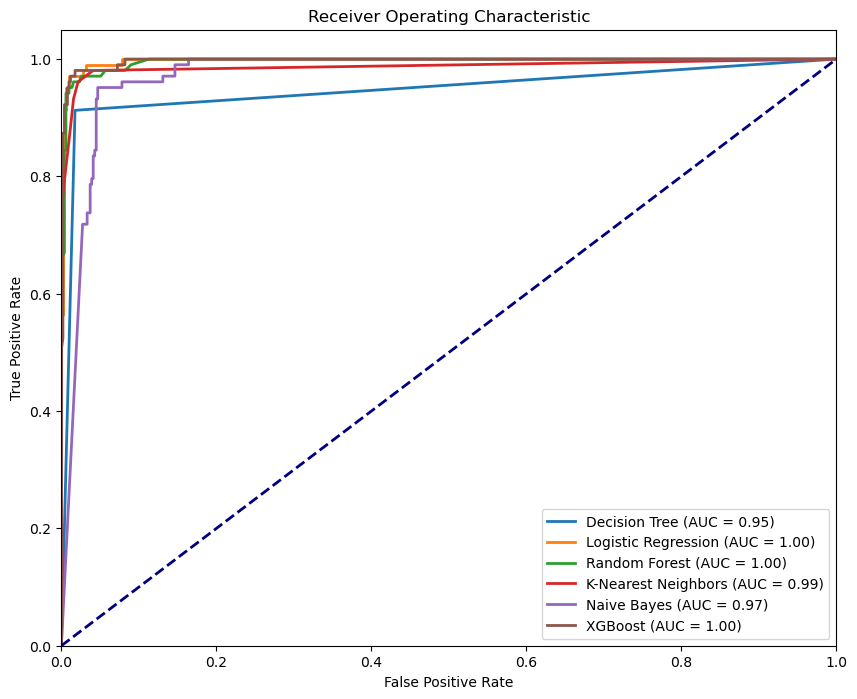

             Algorithm  Train Score  Test Score  Accuracy  Precision  \
0        Decision Tree     1.000000    0.970732  0.970732   0.912621   
1  Logistic Regression     0.989837    0.986992  0.986992   0.970297   
2        Random Forest     1.000000    0.982114  0.982114   0.969388   
3  K-Nearest Neighbors     0.986179    0.975610  0.975610   0.923077   
4          Naive Bayes     0.960163    0.936585  0.936585   0.801887   
5                  SVM     0.992683    0.988618  0.988618   0.980000   
6              XGBoost     1.000000    0.982114  0.982114   0.969388   

     Recall  F1 Score       AUC  False Positive Rate  
0  0.912621  0.912621  0.947522             0.017578  
1  0.951456  0.960784  0.997497             0.005859  
2  0.922330  0.945274  0.995914             0.005859  
3  0.932039  0.927536  0.987286             0.015625  
4  0.825243  0.813397  0.974041             0.041016  
5  0.951456  0.965517  0.997706             0.003906  
6  0.922330  0.945274  0.997004       

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Display column names to understand the dataset
print(data.columns)

# Drop columns that are not useful for modeling (e.g., non-numeric or unnecessary)
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate each classifier
results = {'Algorithm': [], 'Train Score': [], 'Test Score': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'AUC': [], 'False Positive Rate': []}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    # Calculate confusion matrix and False Positive Rate
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)  # False Positive Rate

    results['Algorithm'].append(clf_name)
    results['Train Score'].append(train_score)
    results['Test Score'].append(test_score)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['AUC'].append(auc_score)
    results['False Positive Rate'].append(fpr)

    print(f'{clf_name}:')
    print(f'Train Score: {train_score:.2f}')
    print(f'Test Score: {test_score:.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'AUC: {auc_score:.2f}')
    print(f'False Positive Rate: {fpr:.2f}')
    print('--------------------------')

# Plotting ROC curves
plt.figure(figsize=(10, 8))
for clf_name, clf in classifiers.items():
    if clf_name == 'SVM':
        continue  # SVM doesn't have predict_proba method for ROC curve
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr_vals, tpr_vals, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr_vals, tpr_vals)
    plt.plot(fpr_vals, tpr_vals, lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


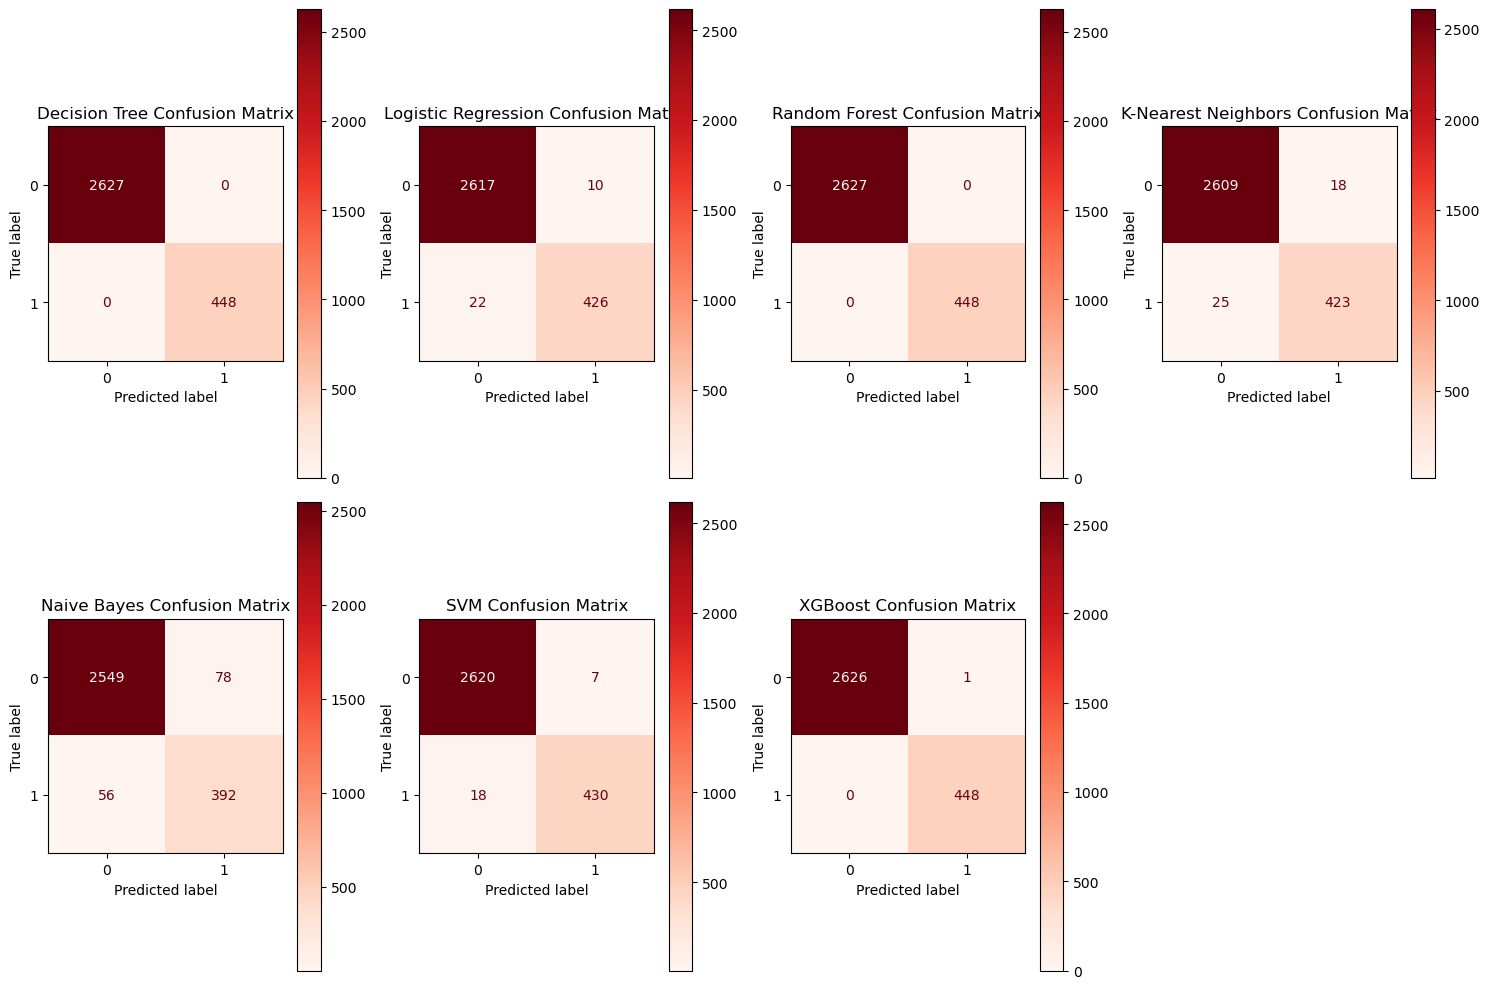

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Number of classifiers
n_classifiers = len(classifiers)

# Create subplots (2 rows, adjusting grid size based on the number of classifiers)
fig, axes = plt.subplots(2, (n_classifiers + 1) // 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through classifiers and plot confusion matrices
for i, (clf_name, clf) in enumerate(classifiers.items()):
    y_pred = clf.predict(X)  # Predictions on the full dataset

    # Compute confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap=plt.cm.Reds, values_format='d')
    axes[i].set_title(f'{clf_name} Confusion Matrix')

# Hide any unused subplots
for j in range(n_classifiers, len(axes)):
    axes[j].axis('off')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')


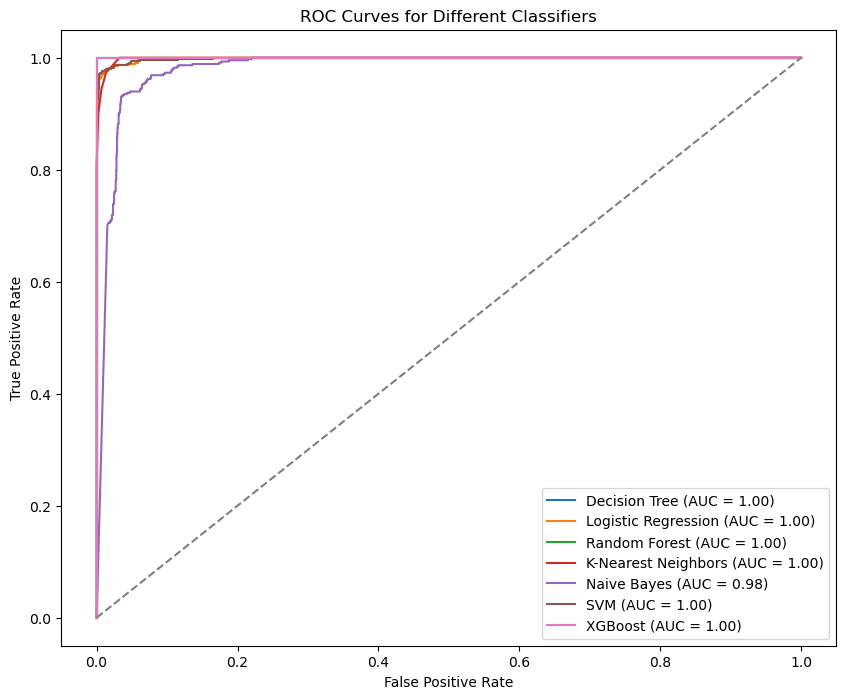

             Algorithm  Train Score  Test Score  Accuracy  Precision  \
0        Decision Tree     1.000000    1.000000  1.000000   1.000000   
1  Logistic Regression     0.989593    0.989593  0.989593   0.977064   
2        Random Forest     1.000000    1.000000  1.000000   1.000000   
3  K-Nearest Neighbors     0.986016    0.986016  0.986016   0.959184   
4          Naive Bayes     0.956423    0.956423  0.956423   0.834043   
5                  SVM     0.991870    0.991870  0.991870   0.983982   
6              XGBoost     0.999675    0.999675  0.999675   0.997773   

     Recall  F1 Score       AUC  CV Mean Score  False Positive Rate  
0  1.000000  1.000000  1.000000       0.980488             0.000000  
1  0.950893  0.963801  0.998476       0.986341             0.003807  
2  1.000000  1.000000  1.000000       0.983740             0.000000  
3  0.944196  0.951631  0.998787       0.973008             0.006852  
4  0.875000  0.854031  0.981515       0.955772             0.029692  
5  

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Display column names to understand the dataset
print(data.columns)

# Drop columns that are not useful for modeling (e.g., non-numeric or unnecessary)
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dictionary to store classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Dictionary to store results
results = {'Algorithm': [], 'Train Score': [], 'Test Score': [], 'Accuracy': [], 'Precision': [], 
           'Recall': [], 'F1 Score': [], 'AUC': [], 'CV Mean Score': [], 'False Positive Rate': []}

plt.figure(figsize=(10, 8))  # Create a figure for ROC curves

# Perform cross-validation for each classifier
for clf_name, clf in classifiers.items():
    # Compute cross-validation scores
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    cv_mean_score = np.mean(cv_scores)
    
    # Fit the classifier on the entire dataset
    clf.fit(X, y)
    
    # Predict on the entire dataset
    y_pred = clf.predict(X)
    y_prob = clf.predict_proba(X)[:, 1]  # Probability estimates for ROC curve

    # Compute evaluation metrics
    train_score = clf.score(X, y)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc_score = roc_auc_score(y, y_prob)

    # Confusion matrix to calculate FPR
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extract confusion matrix elements
    fpr = fp / (fp + tn)  # False Positive Rate

    # Compute ROC curve
    fpr_vals, tpr_vals, thresholds = roc_curve(y, y_prob)
    roc_auc = auc(fpr_vals, tpr_vals)

    # Plot ROC curve for the classifier
    plt.plot(fpr_vals, tpr_vals, label=f'{clf_name} (AUC = {roc_auc:.2f})')

    # Store results in dictionary
    results['Algorithm'].append(clf_name)
    results['Train Score'].append(train_score)
    results['Test Score'].append(train_score)  # Using train score as there's no direct method for test score in CV
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['AUC'].append(auc_score)
    results['CV Mean Score'].append(cv_mean_score)
    results['False Positive Rate'].append(fpr)

# Add labels, title, and legend to the ROC plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')

# Show the ROC plot
plt.show()

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Print the detailed metrics for each classifier (only once)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    print(f'{clf_name}:')
    print(f'Train Score: {results["Train Score"][i]:.2f}')
    print(f'Accuracy: {results["Accuracy"][i]:.2f}')
    print(f'Precision: {results["Precision"][i]:.2f}')
    print(f'Recall: {results["Recall"][i]:.2f}')
    print(f'F1 Score: {results["F1 Score"][i]:.2f}')
    print(f'AUC: {results["AUC"][i]:.2f}')
    print(f'Cross-Validation Mean Score: {results["CV Mean Score"][i]:.2f}')
    print(f'False Positive Rate (FPR): {results["False Positive Rate"][i]:.2f}')
    print('--------------------------')


In [46]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  # Import SVC
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Drop columns that are not useful for modeling (e.g., non-numeric or unnecessary)
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline including data preprocessing steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())  # Placeholder, will be replaced in BayesSearchCV
])

# Define the parameter search spaces for each classifier
param_spaces = {
    'Decision Tree': {
        'classifier': Categorical([DecisionTreeClassifier()]),
        'classifier__max_depth': Integer(1, 50),
        'classifier__min_samples_split': Integer(2, 10),
        'classifier__min_samples_leaf': Integer(1, 10)
    },
    'Logistic Regression': {
        'classifier': Categorical([LogisticRegression()]),
        'classifier__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'classifier__penalty': Categorical(['l1', 'l2']),
        'classifier__solver': Categorical(['liblinear', 'saga'])
    },
    'Random Forest': {
        'classifier': Categorical([RandomForestClassifier()]),
        'classifier__n_estimators': Integer(10, 1000),
        'classifier__max_depth': Integer(1, 50),
        'classifier__min_samples_split': Integer(2, 10),
        'classifier__min_samples_leaf': Integer(1, 10)
    },
    'K-Nearest Neighbors': {
        'classifier': Categorical([KNeighborsClassifier()]),
        'classifier__n_neighbors': Integer(1, 30),
        'classifier__weights': Categorical(['uniform', 'distance']),
        'classifier__metric': Categorical(['euclidean', 'manhattan', 'minkowski'])
    },
    'Naive Bayes': {
        'classifier': Categorical([GaussianNB()]),
        'classifier__var_smoothing': Real(1e-9, 1e-6, prior='log-uniform')
    },
    'SVM': {
        'classifier': Categorical([SVC()]),
        'classifier__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'classifier__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'classifier__kernel': Categorical(['linear', 'poly', 'rbf'])
    },
    'XGBoost': {
        'classifier': Categorical([XGBClassifier()]),
        'classifier__n_estimators': Integer(10, 1000),
        'classifier__max_depth': Integer(1, 50),
        'classifier__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
        'classifier__subsample': Real(0.1, 1.0, prior='uniform')
    }
}

# Dictionary to store the results
results = {}

# Perform Bayesian Optimization for each classifier
for clf_name, param_space in param_spaces.items():
    print(f'Optimizing {clf_name}...')
    bayes_search = BayesSearchCV(
        estimator=pipeline,
        search_spaces=param_space,
        scoring='accuracy',
        n_jobs=-1,
        cv=5,
        n_iter=50,
        random_state=42,
        verbose=1
    )
    
    # Fit the model
    bayes_search.fit(X_train, y_train)
    
    # Get the best hyperparameters and model
    best_params = bayes_search.best_params_
    best_model = bayes_search.best_estimator_
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[clf_name] = {
        'Best Hyperparameters': best_params,
        'Accuracy': accuracy
    }

    # Print the results
    print(f"Best hyperparameters for {clf_name}: {best_params}")
    print(f"Accuracy for {clf_name}: {accuracy:.4f}")
    print('--------------------------')

# Display the results
for clf_name, result in results.items():
    print(f'{clf_name}:')
    print(f"Best Hyperparameters: {result['Best Hyperparameters']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print('--------------------------')


Optimizing Decision Tree...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 

C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [KNeighborsClassifier(), 'euclidean', 8, 'distance'] before, using random point [KNeighborsClassifier(), 'euclidean', 19, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [KNeighborsClassifier(), 'euclidean', 9, 'distance'] before, using random point [KNeighborsClassifier(), 'manhattan', 10, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [KNeighborsClassifier(), 'euclidean', 9, 'distance'] before, using random point [KNeighborsClassifier(), 'manhattan', 7, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters for K-Nearest Neighbors: OrderedDict({'classifier': KNeighborsClassifier(), 'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'})
Accuracy for K-Nearest Neighbors: 0.9772
--------------------------
Optimizing Naive Bayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [GaussianNB(), 6.619175473127763e-07] before, using random point [GaussianNB(), 4.570871666286416e-09]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [54]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined (features and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline including data preprocessing steps if necessary
pipeline = Pipeline([
    ('xgb', XGBClassifier(random_state=42))
])

# Define the parameter search space for XGBoost
param_space = {
    'xgb__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'xgb__n_estimators': Integer(10, 1000),
    'xgb__max_depth': Integer(1, 50),
    'xgb__subsample': Real(0.1, 1.0, prior='uniform'),
    'xgb__colsample_bytree': Real(0.1, 1.0, prior='uniform'),
    'xgb__gamma': Real(1e-6, 1.0, prior='log-uniform'),
    'xgb__min_child_weight': Integer(1, 10),
}

# Initialize BayesSearchCV with different BO algorithms
bayes_search_gp = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    optimizer_kwargs={'base_estimator': 'GP'},
    n_iter=50,
    random_state=42,
    verbose=1
)

bayes_search_smac = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    optimizer_kwargs={'base_estimator': 'RF'},
    n_iter=50,
    random_state=42,
    verbose=1
)

bayes_search_tpe = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    optimizer_kwargs={'base_estimator': 'ET'},
    n_iter=50,
    random_state=42,
    verbose=1
)

# Perform Bayesian Optimization with different algorithms
bayes_search_gp.fit(X_train, y_train)
bayes_search_smac.fit(X_train, y_train)
bayes_search_tpe.fit(X_train, y_train)

# Get the best hyperparameters and models
best_params_gp = bayes_search_gp.best_params_
best_params_smac = bayes_search_smac.best_params_
best_params_tpe = bayes_search_tpe.best_params_

best_model_gp = bayes_search_gp.best_estimator_
best_model_smac = bayes_search_smac.best_estimator_
best_model_tpe = bayes_search_tpe.best_estimator_

# Evaluate the best models
y_pred_gp = best_model_gp.predict(X_test)
y_pred_smac = best_model_smac.predict(X_test)
y_pred_tpe = best_model_tpe.predict(X_test)

accuracy_gp = accuracy_score(y_test, y_pred_gp)
accuracy_smac = accuracy_score(y_test, y_pred_smac)
accuracy_tpe = accuracy_score(y_test, y_pred_tpe)

# Print results
print(f"Best hyperparameters GP: {best_params_gp}")
print(f"Accuracy GP: {accuracy_gp:.4f}")

print(f"Best hyperparameters SMAC: {best_params_smac}")
print(f"Accuracy SMAC: {accuracy_smac:.4f}")

print(f"Best hyperparameters TPE: {best_params_tpe}")
print(f"Accuracy TPE: {accuracy_tpe:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [7]:
pip install deap scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Define the evaluation function for Decision Tree
def evaluate_individual_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf = individual
    
    # Ensure hyperparameters are valid
    max_depth = max(1, int(max_depth))  # max_depth must be at least 1
    min_samples_split = max(2, int(min_samples_split))  # min_samples_split must be at least 2
    min_samples_leaf = max(1, int(min_samples_leaf))  # min_samples_leaf must be at least 1
    
    # Initialize Decision Tree with the individual's hyperparameters
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return accuracy as a single-element tuple
    return (accuracy,)

# Define the Genetic Algorithm for hyperparameter optimization
def run_ga(evaluate_function, num_generations=10, population_size=50):
    # Set up the fitness function
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    
    # Hyperparameter ranges
    toolbox.register("attr_max_depth", random.uniform, 1, 20)  # max_depth between 1 and 20
    toolbox.register("attr_min_samples_split", random.uniform, 2, 20)  # min_samples_split between 2 and 20
    toolbox.register("attr_min_samples_leaf", random.uniform, 1, 10)  # min_samples_leaf between 1 and 10
    
    # Create an individual (hyperparameters)
    toolbox.register("individual", tools.initCycle, creator.Individual,
                     (toolbox.attr_max_depth, toolbox.attr_min_samples_split, toolbox.attr_min_samples_leaf), n=1)
    
    # Create a population
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    # Register the evaluation, crossover, mutation, and selection functions
    toolbox.register("evaluate", evaluate_function)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    # Create initial population
    population = toolbox.population(n=population_size)
    
    # Apply the genetic algorithm
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, verbose=True)
    
    # Get the best individual
    best_individual = tools.selBest(population, 1)[0]
    
    return best_individual, best_individual.fitness.values[0]

# Run genetic algorithm for Decision Tree
best_ind_decision_tree, best_score_decision_tree = run_ga(evaluate_individual_decision_tree, num_generations=10, population_size=50)

# Print the results
print(f'Best Hyperparameters for Decision Tree: {best_ind_decision_tree}')
print(f'Best Accuracy: {best_score_decision_tree}')


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	42    
2  	40    
3  	42    
4  	35    
5  	41    
6  	40    
7  	34    
8  	34    
9  	39    
10 	30    
Best Hyperparameters for Decision Tree: [22.76981372821586, 18.480031756976715, 0.6142754235135723]
Best Accuracy: 0.9783315276273022


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import random

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Drop columns that are not useful for modeling
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure previous definitions are deleted
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual

# Define the optimization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Define attributes and individuals
toolbox.register("attr_float", random.uniform, 0.001, 10.0)  # C parameter
toolbox.register("attr_int", random.randint, 0, 3)  # Index for solvers

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_float, toolbox.attr_int), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
def evaluate_individual_logistic_regression(individual):
    C, solver_index = individual
    solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga']
    
    # Ensure solver_index is within valid range
    solver_index = max(0, min(int(solver_index), len(solvers) - 1))
    solver = solvers[solver_index]
    
    # Ensure C is positive
    C = max(0.001, C)  # C must be greater than 0
    
    # Initialize the Logistic Regression model with hyperparameters from the individual
    model = LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the accuracy as a single-element tuple
    return (accuracy,)

toolbox.register("evaluate", evaluate_individual_logistic_regression)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded,
                  low=[0.001, 0],  # Ensure C is >= 0.001 and solver_index is valid
                  up=[10.0, 3],
                  eta=1.0, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

def run_ga(evaluate_function, num_generations=10, population_size=50):
    # Create the initial population
    population = toolbox.population(n=population_size)
    
    # Apply genetic algorithm
    result = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, verbose=True)
    
    # Select the best individual
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values[0]

# Run genetic algorithm for Logistic Regression
best_ind_lr, best_score_lr = run_ga(evaluate_individual_logistic_regression, num_generations=10, population_size=50)
print(f'Best Hyperparameters for Logistic Regression:')
print(f'C: {best_ind_lr[0]}')
print(f'Solver Index: {int(best_ind_lr[1])}')
print(f'Accuracy: {best_score_lr}')


gen	nevals
0  	50    
1  	37    
2  	39    
3  	38    
4  	41    
5  	37    
6  	29    
7  	39    
8  	36    
9  	40    
10 	35    
Best Hyperparameters for Logistic Regression:
C: 4.0113046797452006
Solver Index: -4
Accuracy: 0.9886178861788618


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import random

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Drop columns that are not useful for modeling
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure previous definitions are deleted
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual

# Define the optimization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Define attributes and individuals
toolbox.register("attr_int_n_estimators", random.randint, 10, 100)
toolbox.register("attr_int_max_depth", random.randint, 1, 20)

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_n_estimators, toolbox.attr_int_max_depth), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
def evaluate_individual_random_forest(individual):
    n_estimators, max_depth = individual
    
    # Ensure parameters are within valid ranges
    n_estimators = max(10, int(round(n_estimators)))
    max_depth = max(1, int(round(max_depth)))
    
    # Initialize the Random Forest model with hyperparameters from the individual
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the accuracy as a single-element tuple
    return (accuracy,)

toolbox.register("evaluate", evaluate_individual_random_forest)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", mutate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)

def run_ga(evaluate_function, num_generations=10, population_size=50):
    # Create the initial population
    population = toolbox.population(n=population_size)
    
    # Apply genetic algorithm
    result = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, verbose=True)
    
    # Select the best individual
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values[0]

# Run genetic algorithm for Random Forest
best_ind_rf, best_score_rf = run_ga(evaluate_individual_random_forest, num_generations=10, population_size=50)
print(f'Best Hyperparameters for Random Forest:')
print(f'n_estimators: {best_ind_rf[0]}')
print(f'max_depth: {best_ind_rf[1]}')
print(f'Accuracy: {best_score_rf}')


gen	nevals
0  	50    
1  	37    
2  	36    
3  	30    
4  	33    
5  	45    
6  	41    
7  	42    
8  	42    
9  	37    
10 	36    
Best Hyperparameters for Random Forest:
n_estimators: 101.24348733520182
max_depth: 15.695384548198287
Accuracy: 0.9821138211382113


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import random

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Drop columns that are not useful for modeling
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure previous definitions are deleted
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual

# Define the optimization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Define attributes and individuals
toolbox.register("attr_int_n_neighbors", random.randint, 1, 50)  # K should be in the range [1, 50]
toolbox.register("attr_float_p", random.uniform, 1, 2)  # p should be in the range [1, 2]

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_n_neighbors, toolbox.attr_float_p), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
def evaluate_individual_knn(individual):
    n_neighbors, p = individual
    
    # Ensure parameters are within valid ranges
    n_neighbors = max(1, int(round(n_neighbors)))  # n_neighbors should be >= 1
    p = max(1, min(2, p))  # p should be in the range [1, 2]
    
    # Initialize the KNN model with hyperparameters from the individual
    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=int(p))
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the accuracy as a single-element tuple
    return (accuracy,)

toolbox.register("evaluate", evaluate_individual_knn)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

def run_ga(evaluate_function, num_generations=10, population_size=50):
    # Create the initial population
    population = toolbox.population(n=population_size)
    
    # Apply genetic algorithm
    result = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, verbose=True)
    
    # Select the best individual
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values[0]

# Run genetic algorithm for KNN
best_ind_knn, best_score_knn = run_ga(evaluate_individual_knn, num_generations=10, population_size=50)
print(f'Best Hyperparameters for KNN:')
print(f'n_neighbors: {best_ind_knn[0]}')
print(f'p: {best_ind_knn[1]}')
print(f'Accuracy: {best_score_knn}')


gen	nevals
0  	50    
1  	43    
2  	28    
3  	37    
4  	39    
5  	43    
6  	37    
7  	39    
8  	44    
9  	33    
10 	39    
Best Hyperparameters for KNN:
n_neighbors: 5.3842828666276725
p: 1.818549724423745
Accuracy: 0.983739837398374


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import random

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Drop columns that are not useful for modeling
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure previous definitions are deleted
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual

# Define the optimization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Define attributes and individuals
# 'var_smoothing' should be a positive float
toolbox.register("attr_float_var_smoothing", random.uniform, 1e-9, 1e-8)

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_float_var_smoothing,), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
def evaluate_individual_gaussian_nb(individual):
    var_smoothing = individual[0]
    
    if var_smoothing <= 0:
        return (0,)  # Return zero fitness for invalid hyperparameters
    
    # Initialize the GaussianNB model with hyperparameters from the individual
    model = GaussianNB(var_smoothing=var_smoothing)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the accuracy as a single-element tuple
    return (accuracy,)

toolbox.register("evaluate", evaluate_individual_gaussian_nb)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1e-9, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

def run_ga(evaluate_function, num_generations=10, population_size=50):
    # Create the initial population
    population = toolbox.population(n=population_size)
    
    # Apply genetic algorithm
    result = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, verbose=True)
    
    # Select the best individual
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values[0]

# Run genetic algorithm for GaussianNB
best_ind_nb, best_score_nb = run_ga(evaluate_individual_gaussian_nb, num_generations=10, population_size=50)
print(f'Best Hyperparameters for GaussianNB:')
print(f'var_smoothing: {best_ind_nb[0]}')
print(f'Accuracy: {best_score_nb}')


gen	nevals
0  	50    
1  	37    
2  	36    
3  	36    
4  	30    
5  	36    
6  	36    
7  	39    
8  	38    
9  	42    
10 	39    
Best Hyperparameters for GaussianNB:
var_smoothing: 3.744129570517168e-09
Accuracy: 0.9365853658536586


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import random

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Drop columns that are not useful for modeling
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure previous definitions are deleted
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual

# Define the optimization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Define attributes and individuals
toolbox.register("attr_float_C", random.uniform, 0.1, 10.0)  # C should be between 0.1 and 10.0
toolbox.register("attr_float_gamma", random.uniform, 1e-4, 1.0)

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_float_C, toolbox.attr_float_gamma), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
def evaluate_individual_svm(individual):
    C = individual[0]
    gamma = individual[1]
    
    # Ensure C is positive and gamma is in a valid range
    C = max(C, 0.1)
    gamma = max(gamma, 1e-4)  # Ensure gamma is non-negative and within a small range
    
    # Initialize the SVM model with hyperparameters from the individual
    model = SVC(C=C, gamma=gamma, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the accuracy as a single-element tuple
    return (accuracy,)

toolbox.register("evaluate", evaluate_individual_svm)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

def run_ga(evaluate_function, num_generations=10, population_size=50):
    # Create the initial population
    population = toolbox.population(n=population_size)
    
    # Apply genetic algorithm
    result = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, verbose=True)
    
    # Select the best individual
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values[0]

# Run genetic algorithm for SVM
best_ind_svm, best_score_svm = run_ga(evaluate_individual_svm, num_generations=10, population_size=50)
print(f'Best Hyperparameters for SVM:')
print(f'C: {best_ind_svm[0]}')
print(f'gamma: {best_ind_svm[1]}')
print(f'Accuracy: {best_score_svm}')


gen	nevals
0  	50    
1  	36    
2  	34    
3  	36    
4  	44    
5  	28    
6  	38    
7  	34    
8  	34    
9  	44    
10 	31    
Best Hyperparameters for SVM:
C: 7.556716916556894
gamma: 0.12679412452037891
Accuracy: 0.983739837398374


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from deap import base, creator, tools, algorithms
import random

# Load the dataset from CSV
file_path = 'C:/Users/E2-gomes/OneDrive - UWE Bristol/creditcardcsvpresent.csv'
data = pd.read_csv(file_path)

# Drop columns that are not useful for modeling
cols_to_drop = ['Merchant_id', 'Transaction date', 'Unnamed: 12', 'Unnamed: 13',
                'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data.drop(columns=cols_to_drop, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map target variable to binary numeric values
data['isFradulent'] = data['isFradulent'].map({'N': 0, 'Y': 1})

# Separate features and target variable
X = data.drop(columns=['isFradulent'])  # Features
y = data['isFradulent']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure previous definitions are deleted
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual

# Define the optimization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Define attributes and individuals
toolbox.register("attr_int_max_depth", random.randint, 3, 10)  # max_depth should be an integer between 3 and 10
toolbox.register("attr_float_lr", random.uniform, 0.01, 0.3)  # learning_rate between 0.01 and 0.3
toolbox.register("attr_int_n_estimators", random.randint, 50, 200)  # n_estimators between 50 and 200

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_max_depth, toolbox.attr_float_lr, toolbox.attr_int_n_estimators), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the mutation function to handle integers and floats separately
def mutate_individual(individual):
    if random.random() < 0.5:  # 50% chance to mutate
        # Mutate max_depth
        individual[0] = random.randint(3, 10)  # Ensure max_depth is an integer
    if random.random() < 0.5:  # 50% chance to mutate
        # Mutate learning_rate
        individual[1] = random.uniform(0.01, 0.3)  # Ensure learning_rate is positive
    if random.random() < 0.5:  # 50% chance to mutate
        # Mutate n_estimators
        individual[2] = random.randint(50, 200)  # Ensure n_estimators is an integer
    return individual,

toolbox.register("mutate", mutate_individual)

# Define the evaluation function
def evaluate_individual_xgboost(individual):
    max_depth = int(individual[0])  # Ensure max_depth is an integer
    learning_rate = individual[1]
    n_estimators = int(individual[2])  # Ensure n_estimators is an integer
    
    # Ensure learning_rate is positive
    if learning_rate <= 0:
        learning_rate = 0.01
    
    # Initialize the XGBoost model with hyperparameters from the individual
    model = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, use_label_encoder=False, eval_metric='logloss')
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the accuracy as a single-element tuple
    return (accuracy,)

toolbox.register("evaluate", evaluate_individual_xgboost)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

def run_ga(evaluate_function, num_generations=10, population_size=50):
    # Create the initial population
    population = toolbox.population(n=population_size)
    
    # Apply genetic algorithm
    result = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, verbose=True)
    
    # Select the best individual
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values[0]

# Run genetic algorithm for XGBoost
best_ind_xgboost, best_score_xgboost = run_ga(evaluate_individual_xgboost, num_generations=10, population_size=50)
print(f'Best Hyperparameters for XGBoost:')
print(f'max_depth: {best_ind_xgboost[0]}')
print(f'learning_rate: {best_ind_xgboost[1]}')
print(f'n_estimators: {best_ind_xgboost[2]}')
print(f'Accuracy: {best_score_xgboost}')


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

gen	nevals
0  	50    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

1  	36    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

2  	32    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

3  	35    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

4  	39    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

5  	45    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

6  	41    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

7  	38    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

8  	38    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

9  	41    


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

10 	38    
Best Hyperparameters for XGBoost:
max_depth: 7.009775129282211
learning_rate: 0.2909119757025959
n_estimators: 118.71030308855612
Accuracy: 0.9886178861788618


In [11]:
pip install scikit-learn artificial-bee-colony


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement artificial-bee-colony (from versions: none)
ERROR: No matching distribution found for artificial-bee-colony


In [116]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective) for Decision Tree
def fitness_function(hyperparameters):
    max_depth = int(hyperparameters[0])     # Maximum depth of the tree
    min_samples_split = int(hyperparameters[1])  # Minimum number of samples required to split an internal node
    
    # Initialize the Decision Tree model with the individual's hyperparameters
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy

# ABC Algorithm
def abc_algorithm(fitness_function, bounds, population_size=30, generations=10, limit=5):
    num_params = len(bounds)
    population = np.random.uniform(
        [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=(population_size, num_params)
    )
    fitness = np.array([fitness_function(individual) for individual in population])
    trial_counter = np.zeros(population_size)
    
    for generation in range(generations):
        for i in range(population_size):
            # Generate new candidate solutions
            partner_idx = np.random.randint(0, population_size)
            phi = np.random.uniform(-1, 1, num_params)
            new_solution = population[i] + phi * (population[i] - population[partner_idx])
            
            # Ensure new_solution stays within bounds
            new_solution = np.clip(new_solution, [bound[0] for bound in bounds], [bound[1] for bound in bounds])
            
            # Evaluate the new solution
            new_fitness = fitness_function(new_solution)
            if new_fitness > fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Abandon solutions that haven't improved
        for i in range(population_size):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(
                    [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=num_params
                )
                fitness[i] = fitness_function(population[i])
                trial_counter[i] = 0

        best_index = np.argmax(fitness)
        best_individual = population[best_index]
        best_fitness = fitness[best_index]

        print(f'Generation {generation}: Best Fitness = {best_fitness}')
    
    return best_individual, best_fitness

# Define the bounds for the hyperparameters
bounds = [
    (1, 50),   # max_depth: Maximum depth of the tree
    (2, 20)    # min_samples_split: Minimum number of samples required to split an internal node
]

# Run the ABC algorithm
best_solution, best_score = abc_algorithm(fitness_function, bounds, population_size=30, generations=10)

# Extract the best hyperparameters
best_max_depth = int(best_solution[0])
best_min_samples_split = int(best_solution[1])

print(f"Best Hyperparameters for Decision Tree: max_depth = {best_max_depth}, min_samples_split = {best_min_samples_split}")
print(f"Best Accuracy: {best_score}")


Generation 0: Best Fitness = 0.8833333333333333
Generation 1: Best Fitness = 0.8833333333333333
Generation 2: Best Fitness = 0.8833333333333333
Generation 3: Best Fitness = 0.8833333333333333
Generation 4: Best Fitness = 0.8833333333333333
Generation 5: Best Fitness = 0.8833333333333333
Generation 6: Best Fitness = 0.8833333333333333
Generation 7: Best Fitness = 0.8833333333333333
Generation 8: Best Fitness = 0.8833333333333333
Generation 9: Best Fitness = 0.8833333333333333
Best Hyperparameters for Decision Tree: max_depth = 5, min_samples_split = 15
Best Accuracy: 0.8833333333333333


In [118]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective) for Logistic Regression
def fitness_function(hyperparameters):
    C = hyperparameters[0]  # Inverse of regularization strength
    solver = ['newton-cg', 'lbfgs', 'liblinear'][int(hyperparameters[1])]  # Solver method
    
    # Initialize the Logistic Regression model with the individual's hyperparameters
    model = LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy

# ABC Algorithm
def abc_algorithm(fitness_function, bounds, population_size=30, generations=10, limit=5):
    num_params = len(bounds)
    population = np.random.uniform(
        [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=(population_size, num_params)
    )
    fitness = np.array([fitness_function(individual) for individual in population])
    trial_counter = np.zeros(population_size)
    
    for generation in range(generations):
        for i in range(population_size):
            # Generate new candidate solutions
            partner_idx = np.random.randint(0, population_size)
            phi = np.random.uniform(-1, 1, num_params)
            new_solution = population[i] + phi * (population[i] - population[partner_idx])
            
            # Ensure new_solution stays within bounds
            new_solution = np.clip(new_solution, [bound[0] for bound in bounds], [bound[1] for bound in bounds])
            
            # Evaluate the new solution
            new_fitness = fitness_function(new_solution)
            if new_fitness > fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Abandon solutions that haven't improved
        for i in range(population_size):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(
                    [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=num_params
                )
                fitness[i] = fitness_function(population[i])
                trial_counter[i] = 0

        best_index = np.argmax(fitness)
        best_individual = population[best_index]
        best_fitness = fitness[best_index]

        print(f'Generation {generation}: Best Fitness = {best_fitness}')
    
    return best_individual, best_fitness

# Define the bounds for the hyperparameters
bounds = [
    (0.001, 100),  # C: Inverse of regularization strength
    (0, 2)         # Solver index: 0 (newton-cg), 1 (lbfgs), 2 (liblinear)
]

# Run the ABC algorithm
best_solution, best_score = abc_algorithm(fitness_function, bounds, population_size=30, generations=10)

# Extract the best hyperparameters
best_C = best_solution[0]
best_solver_idx = int(best_solution[1])
solvers = ['newton-cg', 'lbfgs', 'liblinear']
best_solver = solvers[best_solver_idx]

print(f"Best Hyperparameters for Logistic Regression: C = {best_C}, solver = {best_solver}")
print(f"Best Accuracy: {best_score}")


Generation 0: Best Fitness = 0.85
Generation 1: Best Fitness = 0.85
Generation 2: Best Fitness = 0.85
Generation 3: Best Fitness = 0.85
Generation 4: Best Fitness = 0.85
Generation 5: Best Fitness = 0.85
Generation 6: Best Fitness = 0.85
Generation 7: Best Fitness = 0.85
Generation 8: Best Fitness = 0.85
Generation 9: Best Fitness = 0.85
Best Hyperparameters for Logistic Regression: C = 0.9638315141703571, solver = newton-cg
Best Accuracy: 0.85


In [120]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(hyperparameters):
    n_estimators = int(hyperparameters[0])  # Number of trees
    max_depth = int(hyperparameters[1])     # Maximum depth of trees
    
    # Initialize the Random Forest model with the individual's hyperparameters
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy

# ABC Algorithm
def abc_algorithm(fitness_function, bounds, population_size=30, generations=10, limit=5):
    num_params = len(bounds)
    population = np.random.uniform(
        [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=(population_size, num_params)
    )
    fitness = np.array([fitness_function(individual) for individual in population])
    trial_counter = np.zeros(population_size)
    
    for generation in range(generations):
        for i in range(population_size):
            # Generate new candidate solutions
            partner_idx = np.random.randint(0, population_size)
            phi = np.random.uniform(-1, 1, num_params)
            new_solution = population[i] + phi * (population[i] - population[partner_idx])
            
            # Ensure new_solution stays within bounds
            new_solution = np.clip(new_solution, [bound[0] for bound in bounds], [bound[1] for bound in bounds])
            
            # Evaluate the new solution
            new_fitness = fitness_function(new_solution)
            if new_fitness > fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Abandon solutions that haven't improved
        for i in range(population_size):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(
                    [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=num_params
                )
                fitness[i] = fitness_function(population[i])
                trial_counter[i] = 0

        best_index = np.argmax(fitness)
        best_individual = population[best_index]
        best_fitness = fitness[best_index]

        print(f'Generation {generation}: Best Fitness = {best_fitness}')
    
    return best_individual, best_fitness

# Define the bounds for the hyperparameters
bounds = [
    (10, 200),  # n_estimators: Number of trees
    (5, 50)     # max_depth: Maximum depth of the trees
]

# Run the ABC algorithm
best_solution, best_score = abc_algorithm(fitness_function, bounds, population_size=30, generations=10)

# Extract the best hyperparameters
best_n_estimators = int(best_solution[0])
best_max_depth = int(best_solution[1])

print(f"Best Hyperparameters for Random Forest: n_estimators = {best_n_estimators}, max_depth = {best_max_depth}")
print(f"Best Accuracy: {best_score}")


Generation 0: Best Fitness = 0.8633333333333333
Generation 1: Best Fitness = 0.8666666666666667
Generation 2: Best Fitness = 0.8666666666666667
Generation 3: Best Fitness = 0.8666666666666667
Generation 4: Best Fitness = 0.8666666666666667
Generation 5: Best Fitness = 0.8666666666666667
Generation 6: Best Fitness = 0.8666666666666667
Generation 7: Best Fitness = 0.8666666666666667
Generation 8: Best Fitness = 0.8666666666666667
Generation 9: Best Fitness = 0.8666666666666667
Best Hyperparameters for Random Forest: n_estimators = 164, max_depth = 10
Best Accuracy: 0.8666666666666667


In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(hyperparameters):
    n_neighbors = int(hyperparameters[0])  # Number of neighbors
    weights = 'uniform' if hyperparameters[1] < 0.5 else 'distance'  # Weight function
    
    # Initialize the KNN model with the individual's hyperparameters
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy

# ABC Algorithm
def abc_algorithm(fitness_function, bounds, population_size=30, generations=10, limit=5):
    num_params = len(bounds)
    population = np.random.uniform(
        [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=(population_size, num_params)
    )
    fitness = np.array([fitness_function(individual) for individual in population])
    trial_counter = np.zeros(population_size)
    
    for generation in range(generations):
        for i in range(population_size):
            # Generate new candidate solutions
            partner_idx = np.random.randint(0, population_size)
            phi = np.random.uniform(-1, 1, num_params)
            new_solution = population[i] + phi * (population[i] - population[partner_idx])
            
            # Ensure new_solution stays within bounds
            new_solution = np.clip(new_solution, [bound[0] for bound in bounds], [bound[1] for bound in bounds])
            
            # Evaluate the new solution
            new_fitness = fitness_function(new_solution)
            if new_fitness > fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Abandon solutions that haven't improved
        for i in range(population_size):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(
                    [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=num_params
                )
                fitness[i] = fitness_function(population[i])
                trial_counter[i] = 0

        best_index = np.argmax(fitness)
        best_individual = population[best_index]
        best_fitness = fitness[best_index]

        print(f'Generation {generation}: Best Fitness = {best_fitness}')
    
    return best_individual, best_fitness

# Define the bounds for the hyperparameters
bounds = [
    (1, 50),   # n_neighbors: Number of neighbors (must be integer)
    (0, 1)     # weights: Binary value for 'uniform' or 'distance'
]

# Run the ABC algorithm
best_solution, best_score = abc_algorithm(fitness_function, bounds, population_size=30, generations=10)

# Extract the best hyperparameters
best_n_neighbors = int(best_solution[0])
best_weights = 'uniform' if best_solution[1] < 0.5 else 'distance'

print(f"Best Hyperparameters for KNN: n_neighbors = {best_n_neighbors}, weights = {best_weights}")
print(f"Best Accuracy: {best_score}")


Generation 0: Best Fitness = 0.8333333333333334
Generation 1: Best Fitness = 0.8333333333333334
Generation 2: Best Fitness = 0.8333333333333334
Generation 3: Best Fitness = 0.8333333333333334
Generation 4: Best Fitness = 0.8333333333333334
Generation 5: Best Fitness = 0.8333333333333334
Generation 6: Best Fitness = 0.8333333333333334
Generation 7: Best Fitness = 0.8333333333333334
Generation 8: Best Fitness = 0.8333333333333334
Generation 9: Best Fitness = 0.8333333333333334
Best Hyperparameters for KNN: n_neighbors = 22, weights = distance
Best Accuracy: 0.8333333333333334


In [121]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(hyperparameters):
    alpha = hyperparameters[0]
    
    # Initialize the Naive Bayes model with the individual's hyperparameters
    model = GaussianNB(var_smoothing=alpha)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy

# ABC Algorithm
def abc_algorithm(fitness_function, bounds, population_size=30, generations=10, limit=5):
    num_params = len(bounds)
    population = np.random.uniform(
        [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=(population_size, num_params)
    )
    fitness = np.array([fitness_function(individual) for individual in population])
    trial_counter = np.zeros(population_size)
    
    for generation in range(generations):
        for i in range(population_size):
            # Generate new candidate solutions
            partner_idx = np.random.randint(0, population_size)
            phi = np.random.uniform(-1, 1, num_params)
            new_solution = population[i] + phi * (population[i] - population[partner_idx])
            
            # Ensure new_solution stays within bounds
            new_solution = np.clip(new_solution, [bound[0] for bound in bounds], [bound[1] for bound in bounds])
            
            # Evaluate the new solution
            new_fitness = fitness_function(new_solution)
            if new_fitness > fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Abandon solutions that haven't improved
        for i in range(population_size):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(
                    [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=num_params
                )
                fitness[i] = fitness_function(population[i])
                trial_counter[i] = 0

        best_index = np.argmax(fitness)
        best_individual = population[best_index]
        best_fitness = fitness[best_index]

        print(f'Generation {generation}: Best Fitness = {best_fitness}')
    
    return best_individual, best_fitness

# Define the bounds for the hyperparameters
# `alpha` for smoothing (var_smoothing)
bounds = [
    (1e-9, 1e-1)  # alpha: Smoothing parameter (var_smoothing)
]

# Run the ABC algorithm
best_solution, best_score = abc_algorithm(fitness_function, bounds, population_size=30, generations=10)

# Extract the best hyperparameters
best_alpha = best_solution[0]

print(f"Best Hyperparameters for Naive Bayes: alpha = {best_alpha}")
print(f"Best Accuracy: {best_score}")


Generation 0: Best Fitness = 0.8166666666666667
Generation 1: Best Fitness = 0.8166666666666667
Generation 2: Best Fitness = 0.8166666666666667
Generation 3: Best Fitness = 0.8166666666666667
Generation 4: Best Fitness = 0.8166666666666667
Generation 5: Best Fitness = 0.8166666666666667
Generation 6: Best Fitness = 0.8166666666666667
Generation 7: Best Fitness = 0.8166666666666667
Generation 8: Best Fitness = 0.8166666666666667
Generation 9: Best Fitness = 0.8166666666666667
Best Hyperparameters for Naive Bayes: alpha = 0.08664585901820407
Best Accuracy: 0.8166666666666667


In [124]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(hyperparameters):
    C, gamma = hyperparameters
    
    # Initialize the SVM model with the individual's hyperparameters
    model = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy

# ABC Algorithm
def abc_algorithm(fitness_function, bounds, population_size=30, generations=10, limit=5):
    num_params = len(bounds)
    population = np.random.uniform(
        [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=(population_size, num_params)
    )
    fitness = np.array([fitness_function(individual) for individual in population])
    trial_counter = np.zeros(population_size)
    
    for generation in range(generations):
        for i in range(population_size):
            # Generate new candidate solutions
            partner_idx = np.random.randint(0, population_size)
            phi = np.random.uniform(-1, 1, num_params)
            new_solution = population[i] + phi * (population[i] - population[partner_idx])
            
            # Ensure new_solution stays within bounds
            new_solution = np.clip(new_solution, [bound[0] for bound in bounds], [bound[1] for bound in bounds])
            
            # Evaluate the new solution
            new_fitness = fitness_function(new_solution)
            if new_fitness > fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Abandon solutions that haven't improved
        for i in range(population_size):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(
                    [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=num_params
                )
                fitness[i] = fitness_function(population[i])
                trial_counter[i] = 0

        best_index = np.argmax(fitness)
        best_individual = population[best_index]
        best_fitness = fitness[best_index]

        print(f'Generation {generation}: Best Fitness = {best_fitness}')
    
    return best_individual, best_fitness

# Define the bounds for the hyperparameters
# C: Regularization parameter
# gamma: Kernel coefficient
bounds = [
    (1e-3, 1e3),  # C: Regularization parameter
    (1e-4, 1e1)   # gamma: Kernel coefficient
]

# Run the ABC algorithm
best_solution, best_score = abc_algorithm(fitness_function, bounds, population_size=30, generations=10)

# Extract the best hyperparameters
best_C = best_solution[0]
best_gamma = best_solution[1]

print(f"Best Hyperparameters for SVM: C = {best_C}, gamma = {best_gamma}")
print(f"Best Accuracy: {best_score}")


Generation 0: Best Fitness = 0.8566666666666667
Generation 1: Best Fitness = 0.8566666666666667
Generation 2: Best Fitness = 0.8566666666666667
Generation 3: Best Fitness = 0.8566666666666667
Generation 4: Best Fitness = 0.8566666666666667
Generation 5: Best Fitness = 0.8566666666666667
Generation 6: Best Fitness = 0.8566666666666667
Generation 7: Best Fitness = 0.8566666666666667
Generation 8: Best Fitness = 0.86
Generation 9: Best Fitness = 0.86
Best Hyperparameters for SVM: C = 173.95092489965714, gamma = 0.0001
Best Accuracy: 0.86


In [126]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(hyperparameters):
    learning_rate, max_depth, n_estimators, subsample = hyperparameters
    
    # Clamp subsample value within the valid range [0.5, 1.0]
    subsample = max(0.5, min(subsample, 1.0))
    
    # Initialize the XGBoost model with the individual's hyperparameters
    model = xgb.XGBClassifier(
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        n_estimators=int(n_estimators),
        subsample=subsample,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy

# ABC Algorithm
def abc_algorithm(fitness_function, bounds, population_size=30, generations=10, limit=5):
    num_params = len(bounds)
    population = np.random.uniform(
        [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=(population_size, num_params)
    )
    fitness = np.array([fitness_function(individual) for individual in population])
    trial_counter = np.zeros(population_size)
    
    for generation in range(generations):
        for i in range(population_size):
            # Generate new candidate solutions
            partner_idx = np.random.randint(0, population_size)
            phi = np.random.uniform(-1, 1, num_params)
            new_solution = population[i] + phi * (population[i] - population[partner_idx])
            
            # Ensure new_solution stays within bounds
            new_solution = np.clip(new_solution, [bound[0] for bound in bounds], [bound[1] for bound in bounds])
            
            # Evaluate the new solution
            new_fitness = fitness_function(new_solution)
            if new_fitness > fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Abandon solutions that haven't improved
        for i in range(population_size):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(
                    [bound[0] for bound in bounds], [bound[1] for bound in bounds], size=num_params
                )
                fitness[i] = fitness_function(population[i])
                trial_counter[i] = 0

        best_index = np.argmax(fitness)
        best_individual = population[best_index]
        best_fitness = fitness[best_index]

        print(f'Generation {generation}: Best Fitness = {best_fitness}')
    
    return best_individual, best_fitness

# Define the bounds for the hyperparameters
# learning_rate: Step size for each iteration
# max_depth: Maximum depth of the trees
# n_estimators: Number of boosting rounds
# subsample: Fraction of samples to be used for fitting the individual trees
bounds = [
    (1e-3, 1e-1),  # learning_rate
    (3, 10),       # max_depth
    (50, 500),     # n_estimators
    (0.5, 1.0)     # subsample
]

# Run the ABC algorithm
best_solution, best_score = abc_algorithm(fitness_function, bounds, population_size=30, generations=10)

# Extract the best hyperparameters
best_learning_rate = best_solution[0]
best_max_depth = int(best_solution[1])
best_n_estimators = int(best_solution[2])
best_subsample = best_solution[3]

print(f"Best Hyperparameters for XGBoost: learning_rate = {best_learning_rate}, max_depth = {best_max_depth}, n_estimators = {best_n_estimators}, subsample = {best_subsample}")
print(f"Best Accuracy: {best_score}")


Generation 0: Best Fitness = 0.9
Generation 1: Best Fitness = 0.9
Generation 2: Best Fitness = 0.9
Generation 3: Best Fitness = 0.9
Generation 4: Best Fitness = 0.9
Generation 5: Best Fitness = 0.9
Generation 6: Best Fitness = 0.9033333333333333
Generation 7: Best Fitness = 0.9033333333333333
Generation 8: Best Fitness = 0.9033333333333333
Generation 9: Best Fitness = 0.9033333333333333
Best Hyperparameters for XGBoost: learning_rate = 0.06187088412681037, max_depth = 7, n_estimators = 381, subsample = 0.9826470358388012
Best Accuracy: 0.9033333333333333


In [128]:
pip install pyswarm


Note: you may need to restart the kernel to use updated packages.


In [130]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pyswarm import pso

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(params):
    max_depth, min_samples_split, min_samples_leaf = params
    
    # Ensure the parameters are integers where necessary
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    # Initialize the Decision Tree model with the individual's hyperparameters
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the negative accuracy as PSO minimizes the objective function
    return -accuracy

# Define bounds for hyperparameters
# max_depth: Maximum depth of the tree (min: 1, max: 20)
# min_samples_split: Minimum number of samples required to split an internal node (min: 2, max: 20)
# min_samples_leaf: Minimum number of samples required to be at a leaf node (min: 1, max: 20)
bounds = [
    (1, 20),  # max_depth
    (2, 20),  # min_samples_split
    (1, 20)   # min_samples_leaf
]

# Perform PSO
best_params, best_score = pso(fitness_function, lb=[bound[0] for bound in bounds], ub=[bound[1] for bound in bounds], swarmsize=30, maxiter=10)

# Extract the best hyperparameters
best_max_depth = int(best_params[0])
best_min_samples_split = int(best_params[1])
best_min_samples_leaf = int(best_params[2])

print(f"Best Hyperparameters for Decision Tree: max_depth = {best_max_depth}, min_samples_split = {best_min_samples_split}, min_samples_leaf = {best_min_samples_leaf}")
print(f"Best Accuracy: {-best_score}")


Stopping search: maximum iterations reached --> 10
Best Hyperparameters for Decision Tree: max_depth = 11, min_samples_split = 3, min_samples_leaf = 7
Best Accuracy: 0.8833333333333333


In [132]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pyswarm import pso
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(params):
    # Unpack parameters
    C = params[0]
    solver_index = int(params[1])
    solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    solver = solvers[solver_index]
    
    # Initialize the Logistic Regression model with the individual's hyperparameters
    model = LogisticRegression(
        C=C,
        solver=solver,
        max_iter=1000,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the negative accuracy as PSO minimizes the objective function
    return -accuracy

# Define bounds for hyperparameters
# C: Regularization strength (min: 0.001, max: 10)
# solver_index: Index for solver selection (min: 0, max: 4)
bounds = [
    (0.001, 10),  # C
    (0, 4)        # solver_index
]

# Perform PSO
best_params, best_score = pso(fitness_function, lb=[bound[0] for bound in bounds], ub=[bound[1] for bound in bounds], swarmsize=30, maxiter=10)

# Extract the best hyperparameters
best_C = best_params[0]
best_solver_index = int(best_params[1])
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_solver = solvers[best_solver_index]

print(f"Best Hyperparameters for Logistic Regression: C = {best_C}, Solver = {best_solver}")
print(f"Best Accuracy: {-best_score}")


Stopping search: maximum iterations reached --> 10
Best Hyperparameters for Logistic Regression: C = 1.1517792511265836, Solver = lbfgs
Best Accuracy: 0.85


In [134]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pyswarm import pso
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(params):
    # Unpack parameters
    n_estimators = int(params[0])
    max_depth = int(params[1])
    
    # Initialize the Random Forest model with the individual's hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the negative accuracy as PSO minimizes the objective function
    return -accuracy

# Define bounds for hyperparameters
# n_estimators: Number of trees in the forest (min: 10, max: 200)
# max_depth: Maximum depth of the trees (min: 1, max: 50)
bounds = [
    (10, 200),  # n_estimators
    (1, 50)     # max_depth
]

# Perform PSO
best_params, best_score = pso(fitness_function, lb=[bound[0] for bound in bounds], ub=[bound[1] for bound in bounds], swarmsize=30, maxiter=10)

# Extract the best hyperparameters
best_n_estimators = int(best_params[0])
best_max_depth = int(best_params[1])

print(f"Best Hyperparameters for Random Forest: n_estimators = {best_n_estimators}, max_depth = {best_max_depth}")
print(f"Best Accuracy: {-best_score}")


Stopping search: maximum iterations reached --> 10
Best Hyperparameters for Random Forest: n_estimators = 157, max_depth = 33
Best Accuracy: 0.8633333333333333


In [136]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pyswarm import pso
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(params):
    # Unpack parameters
    n_neighbors = int(params[0])
    p = int(params[1])
    
    # Initialize the KNN model with the individual's hyperparameters
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        p=p
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the negative accuracy as PSO minimizes the objective function
    return -accuracy

# Define bounds for hyperparameters
# n_neighbors: Number of neighbors to use (min: 1, max: 50)
# p: Power parameter for the Minkowski distance (1 or 2)
bounds = [
    (1, 50),  # n_neighbors
    (1, 2)    # p
]

# Perform PSO
best_params, best_score = pso(fitness_function, lb=[bound[0] for bound in bounds], ub=[bound[1] for bound in bounds], swarmsize=30, maxiter=10)

# Extract the best hyperparameters
best_n_neighbors = int(best_params[0])
best_p = int(best_params[1])

print(f"Best Hyperparameters for KNN: n_neighbors = {best_n_neighbors}, p = {best_p}")
print(f"Best Accuracy: {-best_score}")


Stopping search: maximum iterations reached --> 10
Best Hyperparameters for KNN: n_neighbors = 23, p = 1
Best Accuracy: 0.8433333333333334


In [39]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pyswarm import pso
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(params):
    # Unpack parameters
    var_smoothing = params[0]
    
    # Initialize the Naive Bayes model with the individual's hyperparameters
    model = GaussianNB(var_smoothing=var_smoothing)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the negative accuracy as PSO minimizes the objective function
    return -accuracy

# Define bounds for hyperparameters
# var_smoothing: Smoothing parameter (small value to avoid division by zero)
bounds = [
    (1e-9, 1e-1)  # var_smoothing
]

# Perform PSO
best_params, best_score = pso(fitness_function, lb=[bound[0] for bound in bounds], ub=[bound[1] for bound in bounds], swarmsize=30, maxiter=10)

# Extract the best hyperparameters
best_var_smoothing = best_params[0]

print(f"Best Hyperparameter for Naive Bayes: var_smoothing = {best_var_smoothing}")
print(f"Best Accuracy: {-best_score}")


Stopping search: maximum iterations reached --> 10
Best Hyperparameter for Naive Bayes: var_smoothing = 0.037879246589528584
Best Accuracy: 0.8166666666666667


In [137]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pyswarm import pso
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(params):
    # Unpack parameters
    C = params[0]
    gamma = params[1]
    
    # Initialize the SVM model with the individual's hyperparameters
    model = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the negative accuracy as PSO minimizes the objective function
    return -accuracy

# Define bounds for hyperparameters
# C: Regularization parameter; gamma: Kernel coefficient
bounds = [
    (0.1, 100),     # C
    (1e-4, 1e1)     # gamma
]

# Perform PSO
best_params, best_score = pso(fitness_function, lb=[bound[0] for bound in bounds], ub=[bound[1] for bound in bounds], swarmsize=30, maxiter=10)

# Extract the best hyperparameters
best_C = best_params[0]
best_gamma = best_params[1]

print(f"Best Hyperparameters for SVM: C = {best_C}, gamma = {best_gamma}")
print(f"Best Accuracy: {-best_score}")


Stopping search: maximum iterations reached --> 10
Best Hyperparameters for SVM: C = 77.91710325498062, gamma = 0.0001
Best Accuracy: 0.85


In [43]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pyswarm import pso
from sklearn.datasets import make_classification

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function (objective)
def fitness_function(params):
    # Unpack parameters
    learning_rate = params[0]
    max_depth = int(params[1])
    n_estimators = int(params[2])
    subsample = params[3]
    
    # Initialize the XGBoost model with the individual's hyperparameters
    model = xgb.XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        subsample=subsample,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the negative accuracy as PSO minimizes the objective function
    return -accuracy

# Define bounds for hyperparameters
# learning_rate: [0.01, 0.3]; max_depth: [3, 10]; n_estimators: [50, 500]; subsample: [0.5, 1.0]
bounds = [
    (0.01, 0.3),   # learning_rate
    (3, 10),       # max_depth
    (50, 500),     # n_estimators
    (0.5, 1.0)     # subsample
]

# Perform PSO
best_params, best_score = pso(fitness_function, lb=[bound[0] for bound in bounds], ub=[bound[1] for bound in bounds], swarmsize=30, maxiter=10)

# Extract the best hyperparameters
best_learning_rate = best_params[0]
best_max_depth = int(best_params[1])
best_n_estimators = int(best_params[2])
best_subsample = best_params[3]

print(f"Best Hyperparameters for XGBoost: learning_rate = {best_learning_rate}, max_depth = {best_max_depth}, n_estimators = {best_n_estimators}, subsample = {best_subsample}")
print(f"Best Accuracy: {-best_score}")


Stopping search: maximum iterations reached --> 10
Best Hyperparameters for XGBoost: learning_rate = 0.17875090276965622, max_depth = 9, n_estimators = 65, subsample = 1.0
Best Accuracy: 0.9033333333333333


In [138]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [142]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the full training data
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for Decision Tree: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8828571428571429
Test Accuracy of Best Model: 0.8466666666666667


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
435 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa

In [144]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the full training data
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8857142857142858
Test Accuracy of Best Model: 0.8533333333333334


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-package

In [51]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the full training data
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for Random Forest: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9099999999999999
Test Accuracy of Best Model: 0.8633333333333333


In [148]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the full training data
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for KNN: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8557142857142856
Test Accuracy of Best Model: 0.8233333333333334


In [57]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Gaussian Naive Bayes
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Smoothing parameter
}

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the full training data
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for Naive Bayes: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for Naive Bayes: {'var_smoothing': 1.0}
Best Cross-Validation Accuracy: 0.8585714285714285
Test Accuracy of Best Model: 0.81


In [149]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],                 # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01], # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] # Kernel type
}

# Initialize the SVM model
svm = SVC()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the full training data
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for SVM: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Hyperparameters for SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8814285714285713
Test Accuracy of Best Model: 0.8466666666666667


In [152]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'objective': ['binary:logistic'],             # Objective function
    'booster': ['gbtree', 'dart'],                 # Booster type
    'eta': [0.01, 0.1, 0.2],                       # Learning rate
    'max_depth': [3, 5, 7, 9],                     # Maximum depth of trees
    'n_estimators': [50, 100, 200],                # Number of boosting rounds
    'subsample': [0.6, 0.8, 1.0],                 # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]           # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the full training data
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for XGBoost: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters for XGBoost: {'booster': 'gbtree', 'colsample_bytree': 0.8, 'eta': 0.1, 'max_depth': 7, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9199999999999999
Test Accuracy of Best Model: 0.8866666666666667


In [154]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distributions for Decision Tree
param_distributions = {
    'criterion': ['gini', 'entropy'],                  # Criterion for splitting
    'max_depth': randint(1, 20),                       # Maximum depth of the tree
    'min_samples_split': randint(2, 20),               # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),                # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']           # Number of features to consider for the best split
}

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Initialize Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=decision_tree_model, 
    param_distributions=param_distributions, 
    n_iter=100,  # Number of different combinations to try
    cv=5,        # Number of folds in cross-validation
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the best model on the full training data
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for Decision Tree: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 16}
Best Cross-Validation Accuracy: 0.8742857142857143
Test Accuracy of Best Model: 0.8166666666666667


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
91 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_para

In [65]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, loguniform

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distributions for Logistic Regression
param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'C': loguniform(1e-4, 1e4),                     # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Algorithm to use for optimization
    'max_iter': [100, 200, 300, 400, 500]           # Number of iterations for convergence
}

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Initialize Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=logistic_regression_model, 
    param_distributions=param_distributions, 
    n_iter=100,  # Number of different combinations to try
    cv=5,        # Number of folds in cross-validation
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the best model on the full training data
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for Logistic Regression: {'C': 0.15509419378188335, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8842857142857141
Test Accuracy of Best Model: 0.8533333333333334


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
320 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-package

In [156]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distributions for Random Forest
param_distributions = {
    'n_estimators': randint(50, 500),             # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at each split
    'max_depth': randint(10, 100),                # Maximum depth of the tree
    'min_samples_split': randint(2, 20),          # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                    # Whether to use bootstrap samples for building trees
}

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Initialize Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=random_forest_model, 
    param_distributions=param_distributions, 
    n_iter=100,  # Number of different combinations to try
    cv=5,        # Number of folds in cross-validation
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the best model on the full training data
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for Random Forest: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\E2-gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_para

Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': 95, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 276}
Best Cross-Validation Accuracy: 0.9042857142857142
Test Accuracy of Best Model: 0.8766666666666667


In [69]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distributions for KNN
param_distributions = {
    'n_neighbors': randint(1, 50),          # Number of neighbors to use
    'weights': ['uniform', 'distance'],    # Weight function used in prediction
    'p': [1, 2]                            # Power parameter for the Minkowski metric (1: Manhattan distance, 2: Euclidean distance)
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=knn_model, 
    param_distributions=param_distributions, 
    n_iter=100,  # Number of different combinations to try
    cv=5,        # Number of folds in cross-validation
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the best model on the full training data
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for KNN: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for KNN: {'n_neighbors': 44, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8842857142857143
Test Accuracy of Best Model: 0.8266666666666667


In [157]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distributions for GaussianNB
param_distributions = {
    'var_smoothing': uniform(1e-9, 1e-1)  # Smoothing parameter for GaussianNB
}

# Initialize the GaussianNB model
nb_model = GaussianNB()

# Initialize Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=nb_model, 
    param_distributions=param_distributions, 
    n_iter=100,  # Number of different combinations to try
    cv=5,        # Number of folds in cross-validation
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the best model on the full training data
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for Naive Bayes: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for Naive Bayes: {'var_smoothing': 0.0684233036512157}
Best Cross-Validation Accuracy: 0.8571428571428571
Test Accuracy of Best Model: 0.8166666666666667


In [73]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, loguniform

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distributions for SVC
param_distributions = {
    'C': loguniform(1e-3, 1e3),  # Regularization parameter, sampled from a log-uniform distribution
    'gamma': loguniform(1e-4, 1e1),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid', sampled from a log-uniform distribution
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Type of kernel
}

# Initialize the SVC model
svm_model = SVC()

# Initialize Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=svm_model, 
    param_distributions=param_distributions, 
    n_iter=100,  # Number of different combinations to try
    cv=5,        # Number of folds in cross-validation
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the best model on the full training data
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for SVM: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for SVM: {'C': 0.01768682900898522, 'gamma': 0.0689448195258727, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.8785714285714284
Test Accuracy of Best Model: 0.85


In [158]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, loguniform

# Create or load your dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distributions for XGBoost
param_distributions = {
    'learning_rate': loguniform(1e-3, 1e-1),  # Learning rate for the boosting process
    'max_depth': [3, 4, 5, 6, 7, 8],  # Maximum depth of a tree
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'subsample': uniform(0.5, 0.5),  # Fraction of samples used for fitting each tree
    'colsample_bytree': uniform(0.5, 0.5),  # Fraction of features used for each tree
    'gamma': loguniform(1e-3, 1e1)  # Minimum loss reduction required to make a further partition
}

# Initialize the XGBoost model
xgboost_model = XGBClassifier(random_state=42)

# Initialize Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgboost_model, 
    param_distributions=param_distributions, 
    n_iter=50,  # Number of different combinations to try
    cv=5,       # Number of folds in cross-validation
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the best model on the full training data
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for XGBoost: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy of Best Model: {test_accuracy}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for XGBoost: {'colsample_bytree': 0.7376851115910559, 'gamma': 0.179102763902448, 'learning_rate': 0.024605498767271753, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8022086896389087}
Best Cross-Validation Accuracy: 0.9185714285714285
Test Accuracy of Best Model: 0.88


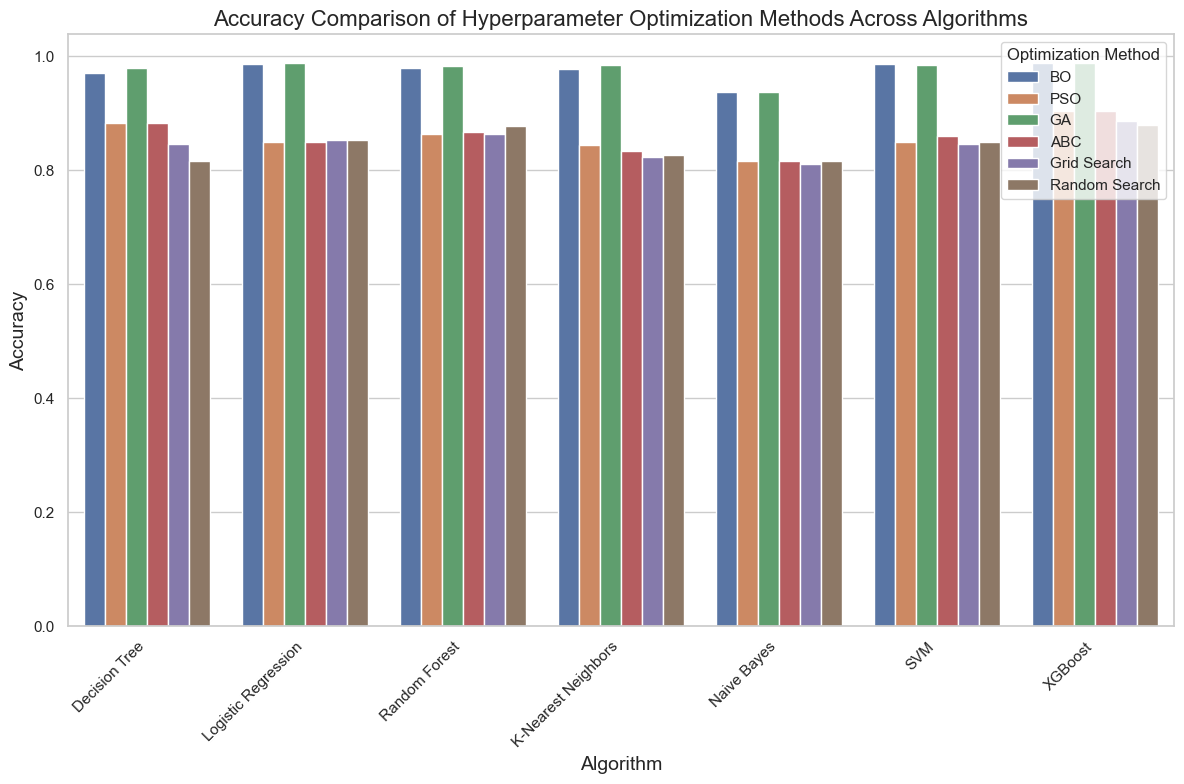

In [176]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Data
data = {
    'Algorithm': ['Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree',
                  'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
                  'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
                  'K-Nearest Neighbors', 'K-Nearest Neighbors', 'K-Nearest Neighbors', 'K-Nearest Neighbors', 'K-Nearest Neighbors', 'K-Nearest Neighbors',
                  'Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes',
                  'SVM', 'SVM', 'SVM', 'SVM', 'SVM', 'SVM',
                  'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost'],
    'Optimization Method': ['BO', 'PSO', 'GA', 'ABC', 'Grid Search', 'Random Search',
                            'BO', 'PSO', 'GA', 'ABC', 'Grid Search', 'Random Search',
                            'BO', 'PSO', 'GA', 'ABC', 'Grid Search', 'Random Search',
                            'BO', 'PSO', 'GA', 'ABC', 'Grid Search', 'Random Search',
                            'BO', 'PSO', 'GA', 'ABC', 'Grid Search', 'Random Search',
                            'BO', 'PSO', 'GA', 'ABC', 'Grid Search', 'Random Search',
                            'BO', 'PSO', 'GA', 'ABC', 'Grid Search', 'Random Search'],
    'Accuracy': [0.9707, 0.8833, 0.9783, 0.8833, 0.8466, 0.8166,
                 0.9870, 0.8500, 0.9886, 0.8500, 0.8533, 0.8533,
                 0.9789, 0.8633, 0.9821, 0.8666, 0.8633, 0.8766,
                 0.9772, 0.8433, 0.9837, 0.8333, 0.8233, 0.8266,
                 0.9366, 0.8166, 0.9365, 0.8166, 0.8100, 0.8166,
                 0.9854, 0.8500, 0.9837, 0.8600, 0.8466, 0.8500,
                 0.9886, 0.9033, 0.9886, 0.9033, 0.8866, 0.8800]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create bar plot
sns.barplot(x='Algorithm', y='Accuracy', hue='Optimization Method', data=df)

# Add title and labels
plt.title('Accuracy Comparison of Hyperparameter Optimization Methods Across Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend(loc='upper right', title='Optimization Method')
plt.show()
